In [2]:
%matplotlib inline

import seaborn as sns
from scipy import stats

In [234]:
copula = GumbelCopula()
theta = copula.fit_corr_param(in_sample2)
theta

1.5274364622662568

C:\Users\hp\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


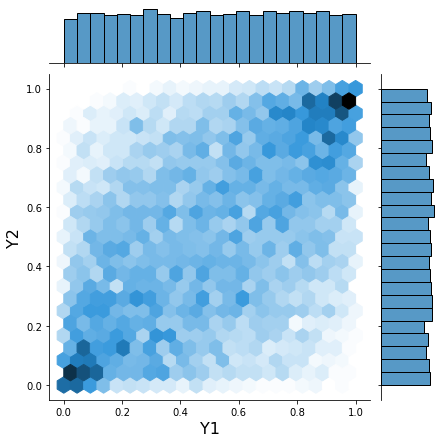

In [23]:
norm = stats.norm()
x_unif = norm.cdf(x)
h = sns.jointplot(x_unif[:, 0], x_unif[:, 1], kind='hex')
h.set_axis_labels('Y1', 'Y2', fontsize=16);

In [131]:
import numpy as np 
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin


yfin.pdr_override()

spy = pdr.get_data_yahoo('TSLA', start='2022-10-24', end='2022-12-23')


[*********************100%***********************]  1 of 1 completed


In [48]:


tickers = pd.read_csv('nasdaq_tickers_all.csv', header=None)[0]
tickers = np.random.choice(tickers.values[1:], size=10, replace=False) # Choose a random set of headers

tickers

array(['BDXB', 'MLTX', 'SOI', 'HSCSW', 'TIPT', 'GTACW', 'INVZW', 'BFAC',
       'APMIU', 'CMTL'], dtype=object)

In [136]:
prices = pd.DataFrame()


for ticker in tickers:

    print(ticker)
    try:
        prices[ticker] = pdr.get_data_yahoo(ticker, start='2010-01-01', end='2022-12-31')['Close']
        
    except Exception as e:
        pass
    

BDXB
[*********************100%***********************]  1 of 1 completed
MLTX
[*********************100%***********************]  1 of 1 completed
SOI
[*********************100%***********************]  1 of 1 completed
TIPT
[*********************100%***********************]  1 of 1 completed
APMIU
[*********************100%***********************]  1 of 1 completed
CMTL
[*********************100%***********************]  1 of 1 completed


In [176]:
yfin.pdr_override()
prices2 = pd.DataFrame()

try:
    prices2["AAPL"] = pdr.get_data_yahoo("AAPL", start='2010-01-01', end='2022-12-31')['Close']

except Exception as e:
    pass
try:
    prices2["AMZN"] = pdr.get_data_yahoo("AMZN", start='2010-01-01', end='2022-12-31')['Close']

except Exception as e:
    pass

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [177]:
prices2

,AAPL,AMZN
Date,,
2009-12-31,7.526071,6.726000
2010-01-04,7.643214,6.695000
2010-01-05,7.656429,6.734500
2010-01-06,7.534643,6.612500
2010-01-07,7.520714,6.500000
...,...,...
2022-12-23,131.860001,85.250000
2022-12-27,130.029999,83.040001
2022-12-28,126.040001,81.820000


In [139]:
returns = prices.pct_change()
returns = returns.iloc[1:, :]# Remove first row of NA's generated by pct_changes()
returns.dropna(axis = 1, thresh=len(returns.index)/2, inplace=True) # Drop stocks with over half the data missing
returns.dropna(axis = 0, thresh=len(returns.columns), inplace=True) # Drop days without data for all stocks
training_period = 100
in_sample = returns.iloc[:(returns.shape[0]-training_period), :].copy()
tickers = in_sample.columns # Remove tickers that were dropped

returns.shape #(323, 69)



(348, 6)

In [178]:
returns2 = prices2.pct_change()
returns2 = returns2.iloc[1:, :]# Remove first row of NA's generated by pct_changes()
returns2.dropna(axis = 1, thresh=len(returns2.index)/2, inplace=True) # Drop stocks with over half the data missing
returns2.dropna(axis = 0, thresh=len(returns2.columns), inplace=True) # Drop days without data for all stocks
training_period = 100
in_sample2 = returns2.iloc[:(returns2.shape[0]-training_period), :].copy()

log_in_sample2 = in_sample2.apply(lambda x : np.log(x+1))

In [118]:

log_in_sample = in_sample.apply(lambda x : np.log(x+1))

In [119]:
log_in_sample

,BDXB,MLTX,SOI,TIPT,APMIU,CMTL
Date,,,,,,
2021-08-16,0.008825,0.000000,-0.026214,-0.017510,0.005063,-0.034997
2021-08-17,0.008385,0.000000,-0.029652,0.010737,0.000000,-0.036672
2021-08-18,-0.011685,0.000000,-0.011004,-0.013685,-0.002022,0.019699
2021-08-19,-0.002574,-0.009095,-0.038060,0.002948,-0.002534,-0.015243
2021-08-20,0.005692,0.005063,0.007158,-0.003933,-0.000507,0.047365
...,...,...,...,...,...,...
2022-08-03,0.007407,-0.152040,-0.013304,-0.006197,0.000000,0.036814
2022-08-04,0.021116,-0.024278,-0.042870,-0.004450,0.003072,0.001720
2022-08-05,0.009716,0.016870,0.018468,-0.006264,0.000000,0.005141


In [108]:
len(in_sample['BDXB'])

248

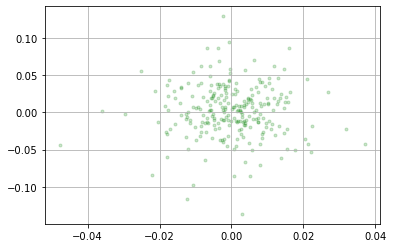

In [107]:
import matplotlib.pyplot as plt
plt.scatter(in_sample['BDXB'],in_sample['SOI'],marker='.',color='green', alpha=0.2)
plt.grid()
plt.show()

In [59]:
import scipy as sp

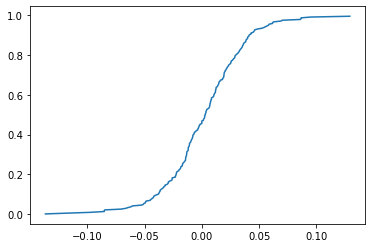

In [99]:
tentative_cdf = np.sort(in_sample["SOI"].values)
plt.plot( tentative_cdf, np.arange(len(tentative_cdf))/len(tentative_cdf))

<AxesSubplot:ylabel='Frequency'>

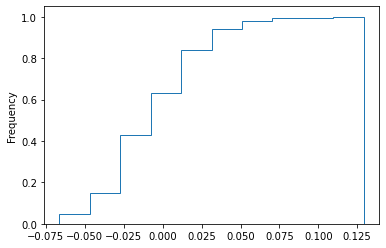

In [89]:
in_sample["SOI"][:150].plot(kind = 'hist', histtype = 'step', density = True, cumulative = True)


Bitcoin 1-in-100 Upside/Downside: 2.5% / -2.8%
Etherium 1-in-100 Upside/Downside: 8.7% / -9.1%


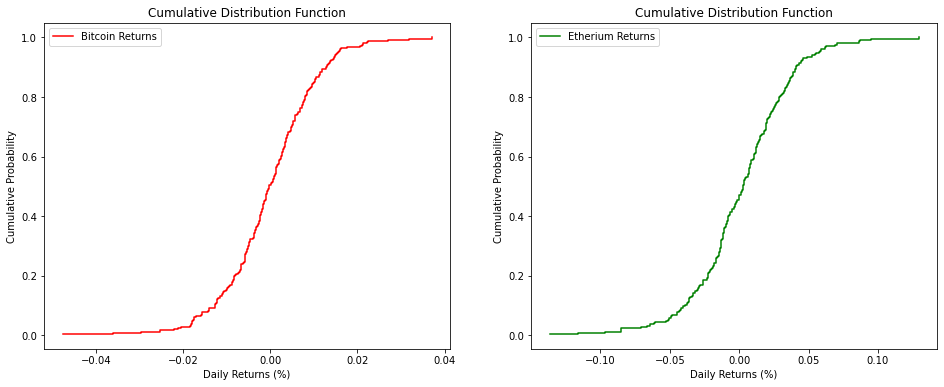

In [63]:

seed = 123

BTC_return = in_sample['BDXB']
ETH_return = in_sample['SOI']
n = len(in_sample['SOI'])
### Emperical CDF
cdf = np.arange(1, n+1) / n
cdf_BTC = np.sort(BTC_return)
cdf_ETH = np.sort(ETH_return)

# ### Percentiles
BTC_upside = np.percentile(BTC_return, 99)
BTC_downside = np.percentile(BTC_return, 1)
ETH_upside = np.percentile(ETH_return, 99)
ETH_downside = np.percentile(ETH_return, 1)

print("Bitcoin 1-in-100 Upside/Downside: {:.1%} / {:.1%}".format(BTC_upside, BTC_downside))
print("Etherium 1-in-100 Upside/Downside: {:.1%} / {:.1%}".format(ETH_upside, ETH_downside))

# ### Plot the sampled PDF and CDF against the theoretical distribution
fig, ax = plt.subplots(figsize=(16,6), nrows=1, ncols=2)

ax[0].step(cdf_BTC, cdf, where='post', color='r', label=r"Bitcoin Returns")
ax[0].set(title="Cumulative Distribution Function", xlabel="Daily Returns (%)", ylabel="Cumulative Probability")
ax[0].legend()

ax[1].step(cdf_ETH, cdf, where='post', color='g', label=r"Etherium Returns")
ax[1].set(title="Cumulative Distribution Function", xlabel="Daily Returns (%)", ylabel="Cumulative Probability")
ax[1].legend()
plt.show()

In [65]:
def copula_gaussian(n, correlation, seed):
    
    ''' Normally distributed random variates X and Y with correlation 'p'
    '''
    
    # Independed Normal distributions
    Z_x = sp.stats.norm.rvs(loc=0, scale=1, size=n, random_state=seed)
    Z_y = sp.stats.norm.rvs(loc=0, scale=1, size=n, random_state=seed*2)
    Z = np.matrix([Z_x, Z_y])
    
    # Construct the correlation matrix and Cholesky Decomposition
    rho = np.matrix([[1, correlation], [correlation, 1]])
    cholesky = np.linalg.cholesky(rho)
    
    # Apply Cholesky and extract X and Y
    Z_XY = cholesky * Z
    X = np.array(Z_XY[0,:]).flatten()
    Y = np.array(Z_XY[1,:]).flatten()
    
    # CDF
    X_cdf = sp.stats.norm.cdf(X, loc=0, scale=1)
    Y_cdf = sp.stats.norm.cdf(Y, loc=0, scale=1)
    
    return X, Y, X_cdf, Y_cdf

def copula_t(n, correlation, df, seed):
    
    ''' Student's t distributed random variates t_X and t_Y with correlation 'p'
        and degrees of freedom 'df'
    '''
    
    # Gaussian Copula
    Zx, Zy, _, _ = copula_gaussian(n=n, correlation=correlation, seed=seed)
    
    # Chi Squared Sample
    np.random.seed(seed)
    ChiSquared = np.random.chisquare(df=df, size=n)

    # Stident's t distributed random variables
    X = Zx / (np.sqrt(ChiSquared / df))
    Y = Zy / (np.sqrt(ChiSquared / df))
    
    # CDF
    X_cdf = sp.stats.t.cdf(X, df=df, loc=0, scale=1)
    Y_cdf = sp.stats.t.cdf(Y, df=df, loc=0, scale=1)
    
    return X, Y, X_cdf, Y_cdf

100% correlated portfolios 1-in-100 Upside/Downside: 11.2% / -11.9%
20% correlated portfolios 1-in-100 Upside/Downside: 11.7% / -11.2%


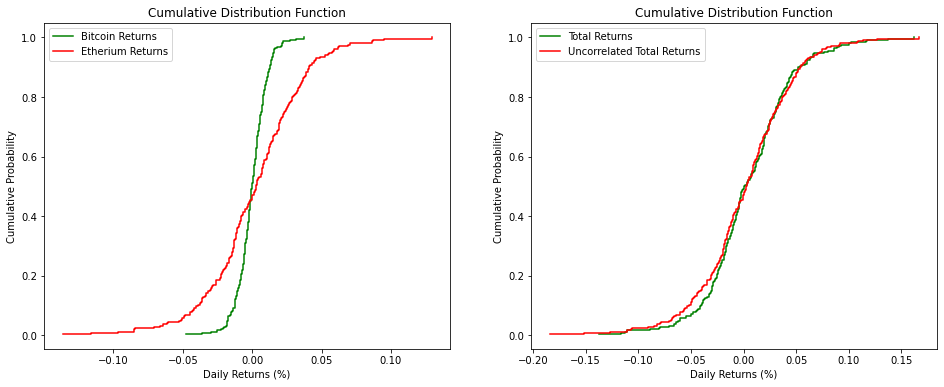

In [70]:
correlation = 0.2
df = 5

# Determine joint Student's t Copula
X, Y, X_cdf, Y_cdf  = copula_t(n=n, correlation=correlation, df=df, seed=123)
copula = np.array([X_cdf, Y_cdf]) * 100

# Marginal returns
marginal_returns = np.array([np.sort(BTC_return), np.sort(ETH_return)])

# Apply Copula to determine the Total Returns
investments = n//10
correlated_returns = np.zeros((investments, n))
for portfolio in range(2):
    correlated_returns[portfolio,:] = np.percentile(a = marginal_returns[portfolio,:], q = copula[portfolio,:], interpolation = 'linear')

total_returns = correlated_returns.sum(axis=0)
cdf_total_returns = np.sort(total_returns)

# # Uncorrelated
uncorrelated_total_returns = marginal_returns.sum(axis=0)
cdf_uncorrelated_total_returns = np.sort(uncorrelated_total_returns)

# ### Percentiles
total_returns_upside = np.percentile(total_returns, 99)
total_returns_downside = np.percentile(total_returns, 1)
uncorrelated_total_returns_upside = np.percentile(uncorrelated_total_returns, 99)
uncorrelated_total_returns_downside = np.percentile(uncorrelated_total_returns, 1)

print("100% correlated portfolios 1-in-100 Upside/Downside: {:.1%} / {:.1%}".format(uncorrelated_total_returns_upside, uncorrelated_total_returns_downside))
print("20% correlated portfolios 1-in-100 Upside/Downside: {:.1%} / {:.1%}".format(total_returns_upside, total_returns_downside))

# ### Plot the sampled PDF and CDF against the theoretical distribution
fig, ax = plt.subplots(figsize=(16,6), nrows=1, ncols=2)

ax[0].step(cdf_BTC, cdf, where='post', color='g', label=r"Bitcoin Returns")
ax[0].step(cdf_ETH, cdf, where='post', color='r', label=r"Etherium Returns")
ax[0].set(title="Cumulative Distribution Function", xlabel="Daily Returns (%)", ylabel="Cumulative Probability")
ax[0].legend()

ax[1].step(cdf_total_returns, cdf, where='post', color='g', label=r"Total Returns")
ax[1].step(cdf_uncorrelated_total_returns, cdf, where='post', color='r', label=r"Uncorrelated Total Returns")
ax[1].set(title="Cumulative Distribution Function", xlabel="Daily Returns (%)", ylabel="Cumulative Probability")
ax[1].legend()
plt.show()

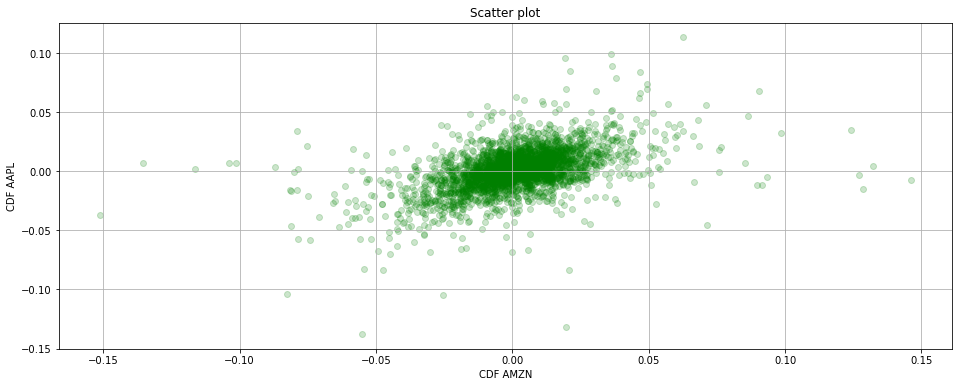

In [197]:
n=10000

### Plot the sampled PDF and CDF against the theoretical distribution
fig, ax = plt.subplots(figsize=(16,6), nrows=1, ncols=1)

### Loop through different correlations

# Determine joint Gaussian distribution
#print("X_cdf :",X_cdf)
#print("Y_cdf :",Y_cdf)
X_cdf = log_in_sample2["AMZN"].values
Y_cdf = log_in_sample2["AAPL"].values
# Plot joint distribution CDF
ax.scatter(X_cdf, Y_cdf, color='g', alpha=0.2)
ax.set(title="Scatter plot", xlabel=r"CDF AMZN", ylabel=r"CDF AAPL")
ax.grid()

plt.show()

In [201]:
log_in_sample2.corr(method ='kendall')
#‘pearson’, ‘kendall’, ‘spearman’

,AAPL,AMZN
AAPL,1.000000,0.345308
AMZN,0.345308,1.000000


In [214]:
"Pearson :",log_in_sample2.corr(method ='pearson')

('Pearson :',
          AAPL     AMZN
 AAPL  1.00000  0.47954
 AMZN  0.47954  1.00000)

In [215]:
log_in_sample2.corr(method ='spearman')

,AAPL,AMZN
AAPL,1.000000,0.484089
AMZN,0.484089,1.000000


array([[<AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'AMZN'}>]], dtype=object)

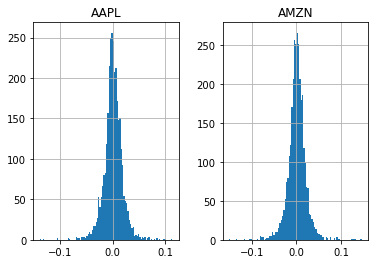

In [184]:
log_in_sample2.hist(bins = 100)


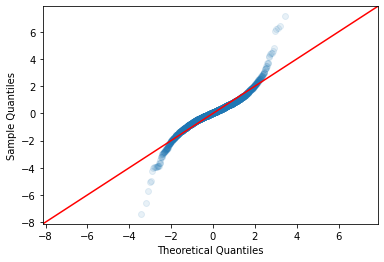

In [181]:
import statsmodels.api as sm
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(log_in_sample2["AMZN"]/np.std(log_in_sample2["AMZN"]), line='45', alpha=0.1)

plt.show()

<AxesSubplot:>

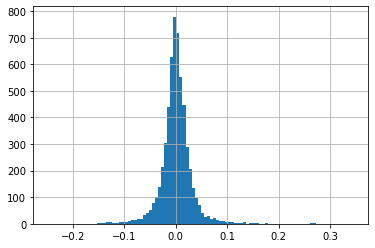

In [168]:
in_sample2["AMZN"].hist(bins = 100)

<AxesSubplot:>

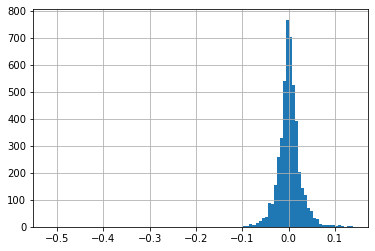

In [157]:
in_sample2["AAPL"][:-1000].hist(bins = 100)

Bitcoin 1-in-100 Upside/Downside: 135.6% / -96.0%
Etherium 1-in-100 Upside/Downside: 151.9% / 48.2%


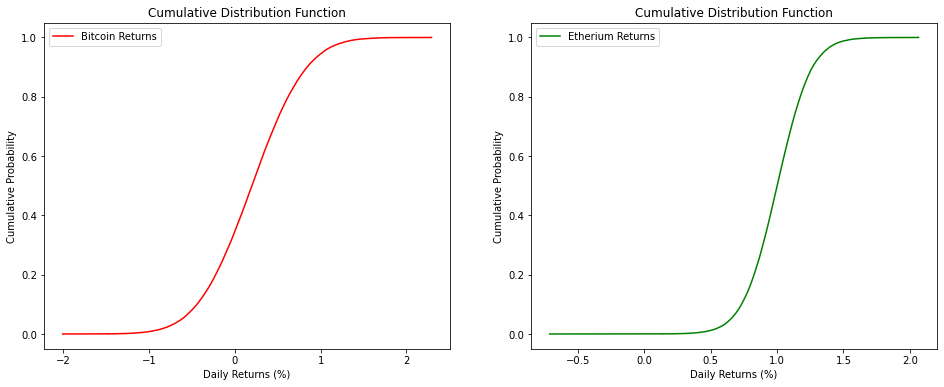

In [61]:
n = 100000
seed = 123

BTC_return = sp.stats.norm.rvs(loc=0.2, scale=0.5, size=n, random_state=seed)
ETH_return = sp.stats.t.rvs(df=15, loc=1, scale=0.2, size=n, random_state=seed)

### Emperical CDF
cdf = np.arange(1, n+1) / n
cdf_BTC = np.sort(BTC_return)
cdf_ETH = np.sort(ETH_return)

# ### Percentiles
BTC_upside = np.percentile(BTC_return, 99)
BTC_downside = np.percentile(BTC_return, 1)
ETH_upside = np.percentile(ETH_return, 99)
ETH_downside = np.percentile(ETH_return, 1)

print("Bitcoin 1-in-100 Upside/Downside: {:.1%} / {:.1%}".format(BTC_upside, BTC_downside))
print("Etherium 1-in-100 Upside/Downside: {:.1%} / {:.1%}".format(ETH_upside, ETH_downside))

# ### Plot the sampled PDF and CDF against the theoretical distribution
fig, ax = plt.subplots(figsize=(16,6), nrows=1, ncols=2)

ax[0].step(cdf_BTC, cdf, where='post', color='r', label=r"Bitcoin Returns")
ax[0].set(title="Cumulative Distribution Function", xlabel="Daily Returns (%)", ylabel="Cumulative Probability")
ax[0].legend()

ax[1].step(cdf_ETH, cdf, where='post', color='g', label=r"Etherium Returns")
ax[1].set(title="Cumulative Distribution Function", xlabel="Daily Returns (%)", ylabel="Cumulative Probability")
ax[1].legend()
plt.show()